<a href="https://colab.research.google.com/github/amaluvincent/Fake-News-Detection/blob/main/Fake_news_detection_V6_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setting up the environment

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install tensorflow keras


# 2.Importing libraraies

In [ ]:
# import necessary libabaries

import pandas as pd # For data manipulation and handling structured datasets.
import matplotlib.pyplot as plt  # For creating visualizations like plots and charts.
import seaborn as sns  # For advanced and aesthetically pleasing visualizations.
import numpy as np  # For numerical computations and handling arrays/matrices.
from sklearn.pipeline import Pipeline  # For creating a pipeline of machine learning models.
from sklearn.feature_extraction.text import TfidfVectorizer # For combining tokenization, TF-IDF transformation, and vectorization .
from sklearn import feature_extraction, linear_model, model_selection # For feature engineering,linear model and model selection.
from sklearn.model_selection import train_test_split #For splitting data into test and train sets.
from sklearn import metrics # For evaluating the performance of machine learning models.
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix, classification_report  # For evaluating the performance.
from sklearn.model_selection import cross_val_score # For handling cross validation.
from sklearn.model_selection import GridSearchCV # For evaluating models
from sklearn.linear_model import LogisticRegression # For importing Logistic Regression model.
from sklearn.ensemble import RandomForestClassifier # FOr importing Random forest model.
from sklearn.tree import DecisionTreeClassifier # For importing Decision tree model.
from sklearn.naive_bayes import MultinomialNB  # FOr importing Naive Bayes model.
import string # For handling string operations relevant to text preprocessing.

import nltk  # For working with human language data(text).
nltk.download('stopwords') # Downloads a list of comomn words ("like","the","a","is") called stopwords.
nltk.download('punkt_tab') # Downloads the 'punkt' resource, which is used for tokenization .
nltk.download('wordnet') #For tasks like finding synonyms, antonyms, and understanding the relationships between words.
from nltk.corpus import stopwords  # For accessing the list of stopwords.
from nltk.stem import WordNetLemmatizer  # For reducing words to their base form.
from nltk.tokenize import word_tokenize # FOr splitting text into individual words.
from wordcloud import WordCloud  # FOr creating visual representation of word frequencies.
from collections import Counter # For counting the frequency of items .
import warnings # Importing warning module.
warnings.filterwarnings("ignore") #FOr ignoring warning messages.

from tensorflow.keras.models import Sequential  # For creating a linear stack of layers for LSTM
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional # help the model learn patterns in the text.
from tensorflow.keras.preprocessing.text import Tokenizer # breaking text intoo words
from tensorflow.keras.callbacks import EarlyStopping # tool for preventing overfitting
from tensorflow.keras.preprocessing.sequence import pad_sequences #To maintain uniform length
from sklearn.model_selection import KFold #  For splitting data into training and validation sets for k-fold cross-validation.
from tensorflow.keras.regularizers import l2 # To prevent overfitting by adding penalties to the model's complexity.
from sklearn.utils.class_weight import compute_class_weight # handle  imbalanced dataset


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# 3.Load dataset

In [ ]:
# Load the ISOT dataset
true_news = pd.read_csv('/content/True.csv')
fake_news =  pd.read_csv('/content/Fake.csv')

# checking the size of each files
print('true:',true_news.shape)
print('fake:', fake_news.shape)


true: (21417, 4)
fake: (23481, 4)


In [ ]:
# Display information about the true news dataset
print("True News Dataset Info:")
true_news.info()

# Display information about the fake news dataset
print("\nFake News Dataset Info:")
fake_news.info()


True News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB

Fake News Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


# 4. Data cleaning and preparation

In [ ]:
# Check for null values in each column of true_news and fake_news
print("Null values in True News dataset:")
print(true_news.isnull().sum())

print("\nNull values in Fake News dataset:")
print(fake_news.isnull().sum())


Null values in True News dataset:
title      0
text       0
subject    0
date       0
dtype: int64

Null values in Fake News dataset:
title      0
text       0
subject    0
date       0
dtype: int64


In [ ]:
# Add a label to each dataframe
true_news['label'] = 0   # 0 for legitimate news
fake_news['label'] = 1   # 1 for fake news

# Combine both datasets
df = pd.concat([true_news, fake_news],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the data

# Print the combined dataset (first few rows)
print(df.head(5))
print(df.shape)



                                               title  \
0  FLASHBACK: ‘The Syrian War: What You’re Not Be...   
1  Trump administration defends travel ban in Sup...   
2   Lindsey Graham Is Getting All War Tingly Agai...   
3  Trump pulls nearly even with Clinton after Rep...   
4   The Internet Can’t Stop Laughing After Sean S...   

                                                text       subject  \
0  21st Century Wire says Back in August 2013, Un...   Middle-east   
1  NEW YORK (Reuters) - President Donald Trump’s ...  politicsNews   
2  Every once in a while, it seems like Sen. Lind...          News   
3   NEW YORK (Reuters) - Republican presidential ...  politicsNews   
4  White House Press Secretary Sean Spicer told r...          News   

                date  label  
0  December 18, 2016      1  
1   August 11, 2017       0  
2     August 1, 2017      1  
3     July 22, 2016       0  
4  February 14, 2017      1  
(44898, 5)


In [ ]:
# Check for missing values after combined
print("Missing values in dataset:\n", df.isnull().sum())

Missing values in dataset:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [ ]:
# print dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [ ]:
# Removing unnecessary column(date)and (title)
df = df.drop(columns=["date", "title"])
print(df.head())

                                                text       subject  label
0  21st Century Wire says Back in August 2013, Un...   Middle-east      1
1  NEW YORK (Reuters) - President Donald Trump’s ...  politicsNews      0
2  Every once in a while, it seems like Sen. Lind...          News      1
3   NEW YORK (Reuters) - Republican presidential ...  politicsNews      0
4  White House Press Secretary Sean Spicer told r...          News      1


In [ ]:
# Removing the word "Reuters"(which is the site were true news collected) in the text
df['text'] = df['text'].str.replace('Reuters', '', case=False)
print(df.head(5))


                                                text       subject  label
0  21st Century Wire says Back in August 2013, Un...   Middle-east      1
1  NEW YORK () - President Donald Trump’s adminis...  politicsNews      0
2  Every once in a while, it seems like Sen. Lind...          News      1
3   NEW YORK () - Republican presidential nominee...  politicsNews      0
4  White House Press Secretary Sean Spicer told r...          News      1


In [ ]:
# Removing the word "Getty images" (which is a visual media company)& "Featured image"in the text
# eg:Print the text before cleaning for the 28th row
print("Before cleaning:")
print(df['text'].iloc[28])

# Perform the cleaning
df['text'] = df['text'].str.replace('Getty Images', '', case=False)
df['text'] = df['text'].str.replace('Featured image', '', case=False)

# Print the text after cleaning for the 28th row
print("\nAfter cleaning:")
print(df['text'].iloc[28])


Before cleaning:
Can you believe it? The clown that can t keep his hands off of women and the faux Indian socialist could be pairing up for a White House run. We really are in the age of the low information voter when these two are seriously considering running and people are seriously considering voting for them. NUTS! Joe Biden has been making his 2016 deliberations all about his late son since August.Aug. 1, to be exact   the day renowned Hillary Clinton-critic Maureen Dowd published a column that marked a turning point in the presidential speculation.BIDEN GAFFES: Read more: POLITICO

After cleaning:
Can you believe it? The clown that can t keep his hands off of women and the faux Indian socialist could be pairing up for a White House run. We really are in the age of the low information voter when these two are seriously considering running and people are seriously considering voting for them. NUTS! Joe Biden has been making his 2016 deliberations all about his late son since Augus

In [ ]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to calculate changes per preprocessing step
def analyze_preprocessing(text):
    if pd.isnull(text) or text.strip() == "":  # Handle NaN or empty string input
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
            'Cleaned Text': ''
        }
    # Initial count of tokens
    original_tokens = word_tokenize(text)   # Tokenization
    total_tokens = len(original_tokens)

     # Check if there are no tokens, return 0 for all changes
    if total_tokens == 0:
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
        }

    # Step-by-step preprocessing
    lowercased_text = text.lower()    # Lowercasing
    lowercased_tokens = word_tokenize(lowercased_text)    #Tokenization
    alphabetic_tokens = [word for word in lowercased_tokens if word.isalpha()]  #Remove non-alphabetic tokens
    non_stopword_tokens = [word for word in alphabetic_tokens if word not in stop_words]  # Stopword removal
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in non_stopword_tokens]    # Lemmatization

    # Calculate changes as percentages
    #total_tokens = len(original_tokens)
    lowercasing_change = 100 if any(word.isupper() for word in original_tokens) else 0
    non_alpha_removed = (len(lowercased_tokens) - len(alphabetic_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    stopword_removed = (len(alphabetic_tokens) - len(non_stopword_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    lemmatization_changes = sum(1 for orig, lemma in zip(non_stopword_tokens, lemmatized_tokens) if orig != lemma) / total_tokens * 100 if non_stopword_tokens else 0

     # Join the lemmatized tokens to form the cleaned text
    cleaned_text = ' '.join(lemmatized_tokens)

    return {
        'Lowercasing Change (%)': lowercasing_change,
        'Non-Alpha Removed (%)': non_alpha_removed,
        'Stopwords Removed (%)': stopword_removed,
        'Lemmatization Changes (%)': lemmatization_changes,
        'Cleaned Text': cleaned_text
    }

# Apply the analysis function to each text in the dataframe and create a new dataframe to store results
df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)', 'Stopwords Removed (%)',
    'Lemmatization Changes (%)','cleaned_text']] = df['text'].apply(lambda x: pd.Series(analyze_preprocessing(x)))

# Display average percentages across all text entries
average_changes = df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)',
                      'Stopwords Removed (%)', 'Lemmatization Changes (%)']].mean()
print("Average Changes across all texts:\n", average_changes)

Average Changes across all texts:
 Lowercasing Change (%)       94.690187
Non-Alpha Removed (%)        13.402350
Stopwords Removed (%)        37.077629
Lemmatization Changes (%)     5.621640
dtype: float64


In [ ]:
# Print the original and cleaned text
print(df[['text','cleaned_text','Lowercasing Change (%)', 'Non-Alpha Removed (%)',
          'Stopwords Removed (%)', 'Lemmatization Changes (%)']].head(10))  # Display the first 10 rows

                                                text  \
0  21st Century Wire says Back in August 2013, Un...   
1  NEW YORK () - President Donald Trump’s adminis...   
2  Every once in a while, it seems like Sen. Lind...   
3   NEW YORK () - Republican presidential nominee...   
4  White House Press Secretary Sean Spicer told r...   
5  Former Vice President Joe Biden was asked on M...   
6  SEOUL () - South Korean President Moon Jae-in ...   
7  CAIRO () - An Egyptian court sentenced a Briti...   
8  Listen:After creating a video that included a ...   
9  What a role model for women and young girls, a...   

                                        cleaned_text  Lowercasing Change (%)  \
0  century wire say back august united nation inv...                     100   
1  new york president donald trump administration...                     100   
2  every seems like lindsey graham might growing ...                     100   
3  new york republican presidential nominee donal...           

In [ ]:
X = df['cleaned_text']
y = df['label']

# Check for duplicates in the input features
print(f"Number of duplicate rows in X: {X.duplicated().sum()}")

# Check for duplicates in the combination of X and y (to consider label alignment)
data = pd.DataFrame({'X': X, 'y': y})
print(f"Number of duplicate rows in combined X and y: {data.duplicated().sum()}")


Number of duplicate rows in X: 6468
Number of duplicate rows in combined X and y: 6467


In [ ]:
# Combine X and y into a single DataFrame
data = pd.DataFrame({'X': X, 'y': y})

# Drop duplicates based on both features and labels
data = data.drop_duplicates()

# Separate the cleaned data back into X and y
X = data['X']
y = data['y']

# Print the number of duplicates after cleaning
print(f"Number of duplicate rows in X after cleaning: {X.duplicated().sum()}")
print(f"Number of duplicate rows in combined X and y after cleaning: {data.duplicated().sum()}")


Number of duplicate rows in X after cleaning: 1
Number of duplicate rows in combined X and y after cleaning: 0


In [ ]:
# Check for NaN values in 'cleaned_text' after preprocessing
missing_values = df['cleaned_text'].isna().sum()
print(f"Number of NaN values in 'cleaned_text': {missing_values}")


Number of NaN values in 'cleaned_text': 0


# 5.Exploratory Data Analysis

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


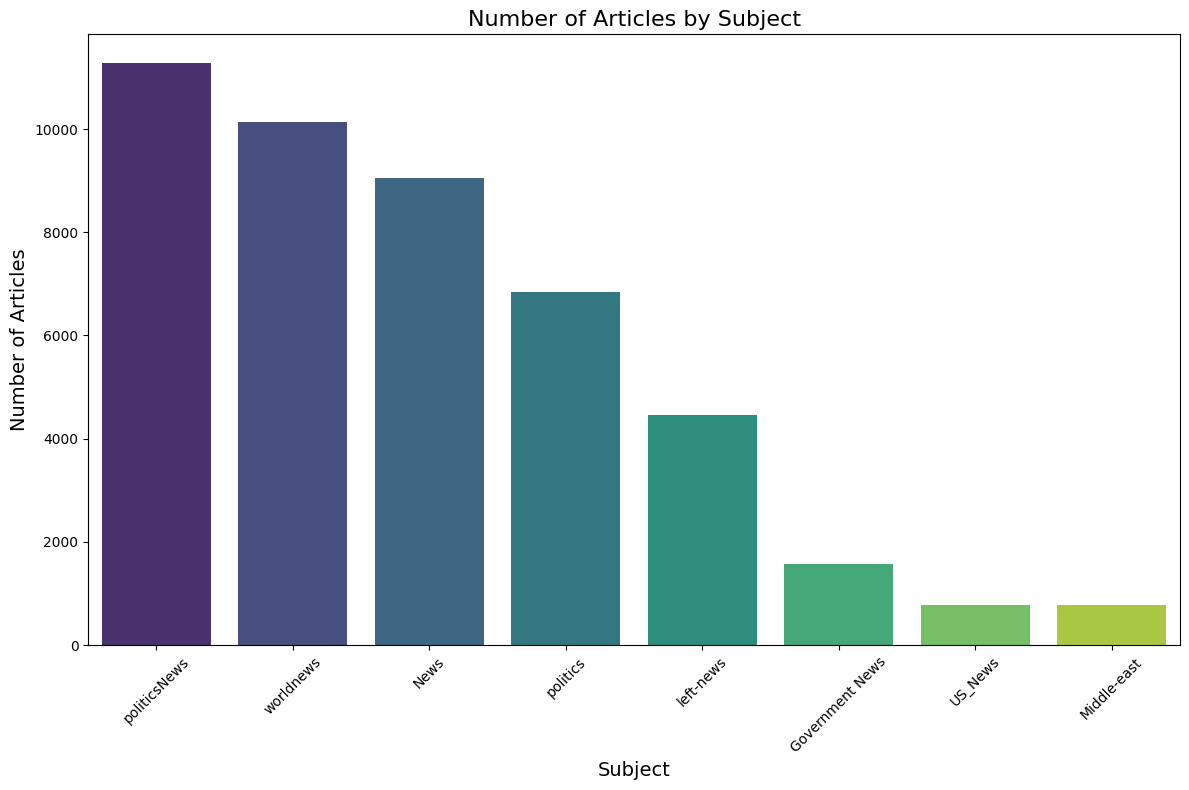

In [ ]:
# 5.1 Count the number of articles by subject
subject_counts = df['subject'].value_counts()
print(subject_counts)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Number of Articles by Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


label
1    23481
0    21417
Name: count, dtype: int64


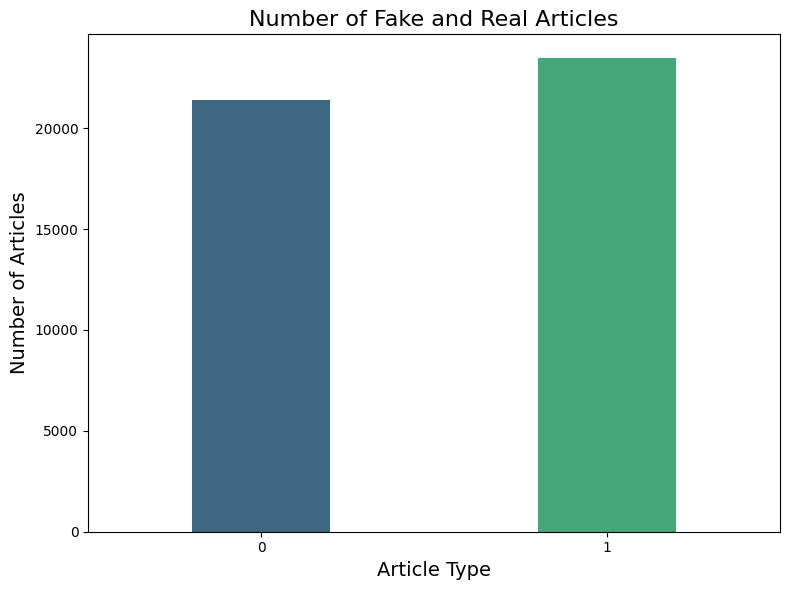

In [ ]:
# 5.2 How many fake and real articles?
article_counts = df['label'].value_counts()
print(article_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=article_counts.index, y=article_counts.values,palette='viridis', width=0.4)
plt.title('Number of Fake and Real Articles', fontsize=16)
plt.xlabel('Article Type', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


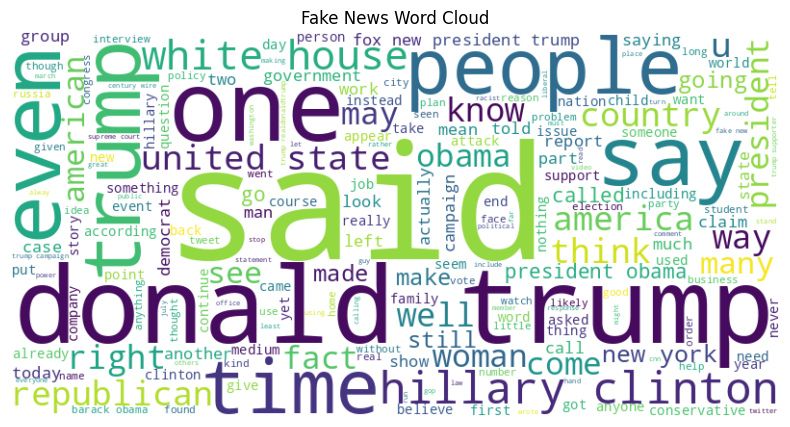

In [ ]:
# 5.3 Word cloud for fake news
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

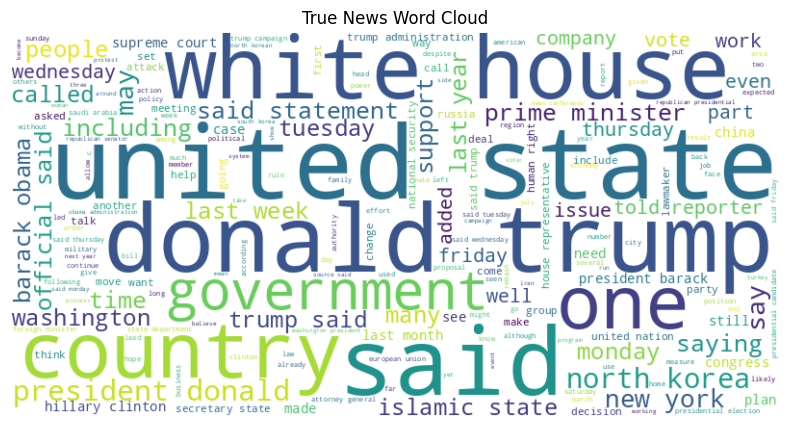

In [ ]:
# 5.4 Word cloud for true news
true_words = ' '.join(df[df['label'] == 0]['cleaned_text'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word Cloud')
plt.show()

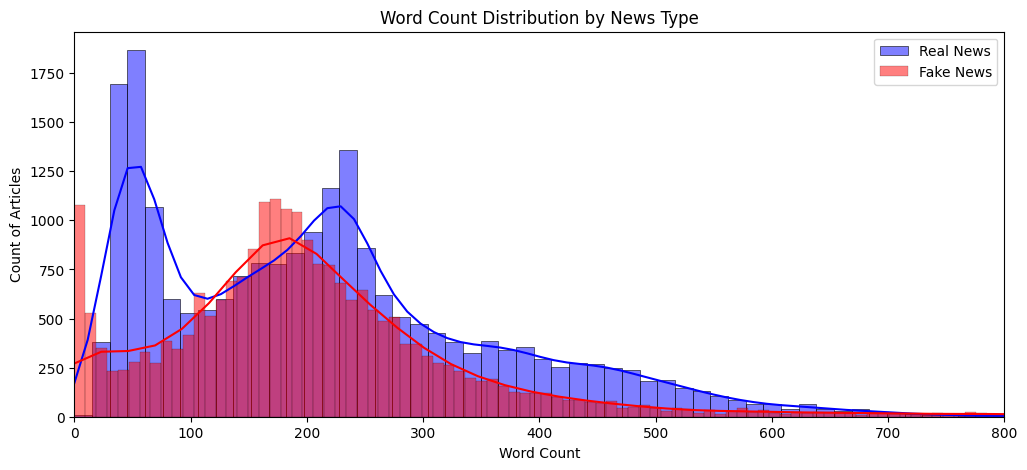

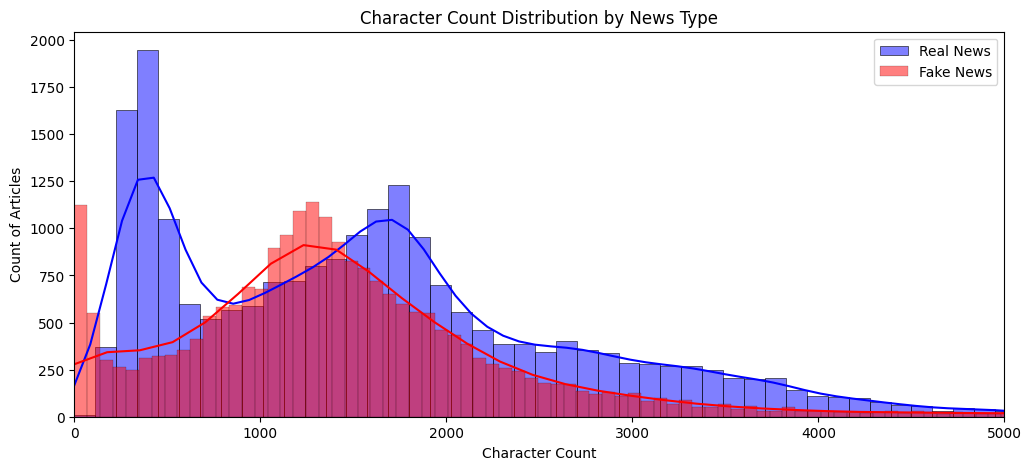

In [ ]:
# 5.5 Word count and sentence length analysis
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_text'].apply(len)

# Visualize word and character count distributions
plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['word_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['word_count'], color='red', label='Fake News', kde=True)
plt.title("Word Count Distribution by News Type")
plt.xlabel("Word Count")
plt.ylabel("Count of Articles")
plt.xlim(0, 800)
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['char_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['char_count'], color='red', label='Fake News', kde=True)
plt.title("Character Count Distribution by News Type")
plt.xlabel("Character Count")
plt.ylabel("Count of Articles")
plt.xlim(0, 5000)
plt.legend()
plt.show()

Top 20 words in Fake News: [('trump', 74486), ('said', 31161), ('president', 26391), ('people', 26143), ('one', 23834), ('would', 23462), ('state', 22100), ('clinton', 18733), ('like', 18207), ('obama', 17927), ('time', 17917), ('donald', 17241), ('american', 16099), ('republican', 16076), ('say', 15533), ('also', 15243), ('year', 14887), ('news', 14207), ('new', 14198), ('u', 14184)]
Top 20 words in Real News: [('said', 99037), ('trump', 54280), ('state', 36243), ('would', 31526), ('president', 26939), ('republican', 22098), ('government', 19433), ('year', 18721), ('house', 16906), ('new', 16784), ('also', 15946), ('united', 15576), ('people', 15207), ('party', 14964), ('official', 14575), ('told', 14244), ('country', 13948), ('election', 13910), ('could', 13709), ('one', 13025)]


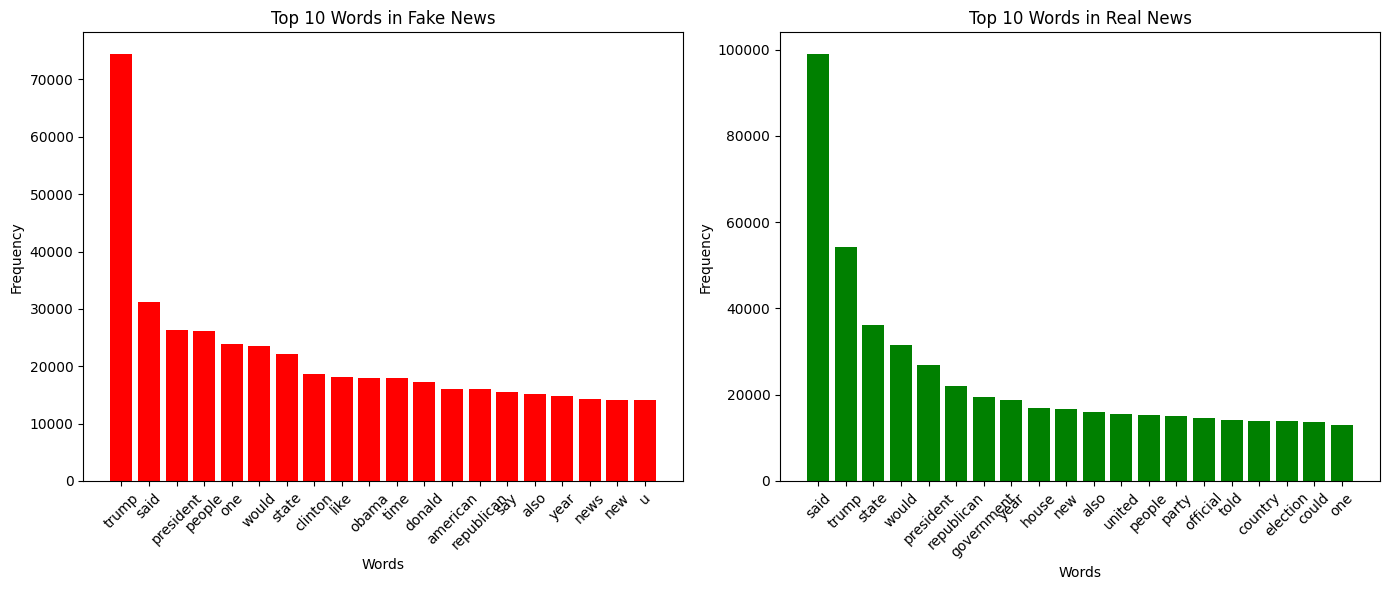

In [ ]:
# 5.6 Most  frequent words counter
# Fake News Word Frequency
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text']).split()
counter_fake = Counter(fake_words)  # counting word frequency
top_fake = counter_fake.most_common(20)
print("Top 20 words in Fake News:", counter_fake.most_common(20))

# Real News Word Frequency
real_words = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
counter_real = Counter(real_words)
top_real = counter_real.most_common(20)
print("Top 20 words in Real News:", counter_real.most_common(20))

# Unpack the top words and their counts for fake and real news
fake_words_list, fake_counts = zip(*top_fake)
real_words_list, real_counts = zip(*top_real)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fake News Plot
axes[0].bar(fake_words_list, fake_counts, color='red')
axes[0].set_title('Top 10 Words in Fake News')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Words')
axes[0].set_xticklabels(fake_words_list, rotation=45)

# Real News Plot
axes[1].bar(real_words_list, real_counts, color='green')
axes[1].set_title('Top 10 Words in Real News')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(real_words_list, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# 6.Training & Testing Data

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (30744,)
y_train shape: (30744,)
X_test shape: (7687,)
y_test shape: (7687,)


In [ ]:
# Check for overlap between training and testing datasets
common_samples = np.intersect1d(X_train, X_test)
print(f"Number of overlapping samples between train and test: {len(common_samples)}")

# Confirm stratification by comparing class distributions
print("Class distribution in training set:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

Number of overlapping samples between train and test: 0
Class distribution in training set:
y
0    0.547391
1    0.452609
Name: proportion, dtype: float64

Class distribution in testing set:
y
0    0.547418
1    0.452582
Name: proportion, dtype: float64


In [ ]:
# Removing the common word/ frequent words in both articles to avoid data leakage

# Combine the lists of most frequent words
common_words = set(fake_words_list + real_words_list)

# Function to remove common words from text
def remove_common_words(text):
    return ' '.join([word for word in text.split() if word not in common_words])

# Apply the function to remove common words from training and test sets
X_train = X_train.apply(remove_common_words)
X_test = X_test.apply(remove_common_words)

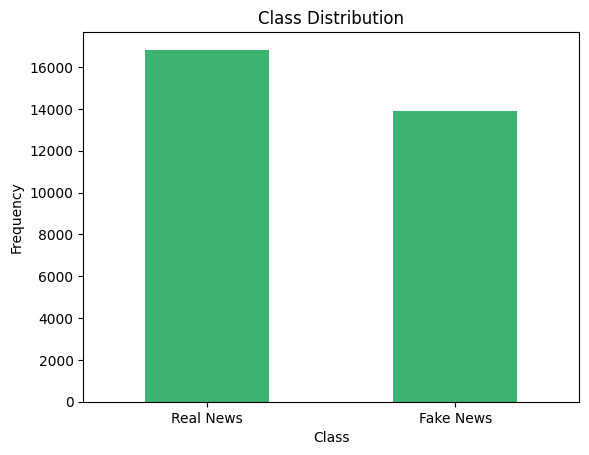

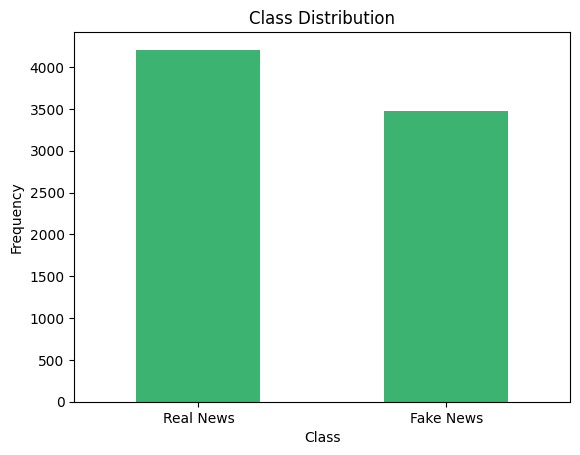

In [ ]:
# Evaluate class distribution of y_train and y_test

# Plot class distribution
def plot_class_distribution(y):
    y.value_counts().plot(kind='bar', color='mediumseagreen')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'], rotation=0)
    plt.show()

# Plot class distribution for training and test sets
plot_class_distribution(y_train)
plot_class_distribution(y_test)

# 7. Feature Extraction
This part of the code deals with converting the text data (news articles) into a numerical format that machine learning models can understand. This process is called feature extraction. The specific technique used here is called TF-IDF (Term Frequency-Inverse Document Frequency).

1)tf (term frequency):-which counts the number of time a particular words is repearting in a documents.

2)idf (inverse document frequency):-Measure the word is a rare word or common word in a document

In [ ]:
vectorization = TfidfVectorizer(max_features=10000,ngram_range=(1,2))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [ ]:
print("Vocabulary size:", len(vectorization.vocabulary_))


Vocabulary size: 10000


# 8. Model Training & Evaluation

In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes, cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


### 8.1 Logistic Regression:
A supervised machine learning algorithm
widely used for binary classification tasks.Logistic regression is used to
predict the categorical dependent variable. It's used when the prediction is categorical, for example, yes or no, true or false, 0 or 1.

This code performs a systematic search for the best hyperparameters for a Logistic Regression model using cross-validation, trains the model with those parameters, and then evaluates its performance on unseen test data. This process helps to find a model that generalizes well to new data and provides a reliable estimate of its accuracy.

In [ ]:
# Initialize and train Logistic Regression Model
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
log_reg = LogisticRegression(class_weight='balanced', random_state=42)

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xv_train, y_train)
print(f"Best Parameters for Logistic Regression: {grid_search.best_params_}")

#Train the model with the best parameters
best_lr = grid_search.best_estimator_

# Evaluate on the test data
pred_lr = best_lr.predict(xv_test)
print("Logistic Regression with Best Parameters - Accuracy:", best_lr.score(xv_test, y_test))


Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression with Best Parameters - Accuracy: 0.9841290490438402



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4208
           1       0.99      0.98      0.98      3479

    accuracy                           0.98      7687
   macro avg       0.98      0.98      0.98      7687
weighted avg       0.98      0.98      0.98      7687



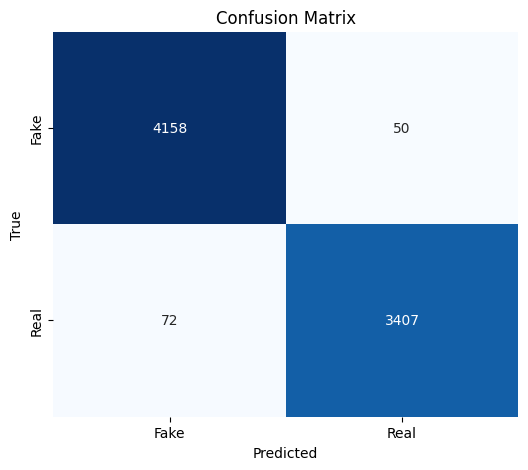

In [ ]:
# CLassification report and plot confusion matrix
print("\nLogistic Regression Classification Report:")
print (classification_report(y_test, pred_lr))
cm = metrics.confusion_matrix(y_test, pred_lr)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])
